# Derivation of sentiment fuzzy sets

In this notebook I use data collected with [this sentiment survey](https://github.com/msvana/sentiment-survey) to derive fuzzy sets representing the intensity of positive and negative opinion no the TextBlob polarity domain. These are then used to calculate the degree of conformity between a fuzzy number representing opinion towards a specific topic and positive and negative opinion. 

In [26]:
from hashlib import md5

import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

## Loading and preprocessing data

We start by loading the dataset with tweets from Ostrava that were used in the survey. We calculate the md5 hash for each tweet, so we can later join the text with survey data.

In [6]:
df = pd.read_csv('../datasets/tweets_ostrava_translated.csv', header=None)
df.columns = ['author_id', 'text_orig', 'date_published', 'likes', 'retweets', 'text_en']
df['hash'] = df['text_orig'].apply(lambda t: md5(str(t).encode()).hexdigest())
df.head()

,author_id,text_orig,date_published,likes,retweets,text_en,hash
0,2765861635,"Bohuzel budou do Tutecka letat dale, jen tank...",2023-03-17 02:58:29+00:00,4,1,"Unfortunately, they will continue to fly to T...",91d7ffe10c935d229688deba8f06e6fe
1,946371211411513346,Já si mohu uložit tvé fotky? Bez svolení? To ...,2023-03-17 00:40:37+00:00,0,0,Can I save your pictures? Without permission?...,8420730a27d85fc7920b10910265457a
2,729345398,"Arsenal-Sporting, 3 hodiny zábavy 👌",2023-03-16 22:47:06+00:00,7,1,"Arsenal-Sporting, 3 hours of fun 👌",8da8ca90db5c51454278e5ae037e1b08
3,864219563172532224,Levice si mne získala již ve velmi útlém věku. ✨,2023-03-16 21:21:56+00:00,31,2,The left won me over at a very young age. ✨,4687fd0e5c667070a50ace6ff31f8418
4,917807011152191494,tim jsem byla posedla kdyz mi bylo 11 let,2023-03-16 20:18:15+00:00,7,1,I was obsessed with it when I was 11 years old.,25bac347f307b89149aa811a633cfc46


Now we load sentiment survey data and group the rows by tweet ID which corresponds to the md5 hash 
of the original text. All user sentiment ratings for a given tweet are then averaged. We add both original and English texts to to each record.

In [11]:
survey_df = pd.read_csv('../datasets/sentiment_survey.csv', header=None)
survey_df.columns = [
    'id', 'pos', 'neg', 'order', 'response_timestamp_start_ms', 'response_timestamp_end_ms']
survey_df = survey_df.groupby('id').mean()
survey_df['id'] = survey_df.index.values
survey_df['text_en'] = survey_df['id'].apply(lambda i: df[df['hash'] == i]['text_en'].values)
survey_df['text_orig'] = survey_df['id'].apply(lambda i: df[df['hash'] == i]['text_orig'].values)
survey_df['text_en'] = survey_df['text_en'].apply(lambda t: t[0] if len(t) else None)
survey_df['text_orig'] = survey_df['text_orig'].apply(lambda t: t[0] if len(t) else None)

survey_df.head()

,pos,neg,order,response_timestamp_start_ms,response_timestamp_end_ms,id,text_en,text_orig
id,,,,,,,,
003f33e1e8335f4bd054dd8238371537,2.0,0.0,13.0,1.688980e+12,1.688980e+12,003f33e1e8335f4bd054dd8238371537,"Coming tomorrow, don't forget to come by ✌️Klu...","Už zítra, nezapomeňte přijít ✌️Kluci vypadají ..."
004d615dc24d33e0662af1b956ce3b92,1.0,1.0,6.0,1.689064e+12,1.689064e+12,004d615dc24d33e0662af1b956ce3b92,Did the branch really just call me to set up a...,"Opravdu mi teď volali z pobočky, aby si se mno..."
0057355b2e7d33f9e71b3eecf19098c0,2.0,0.0,10.0,1.689156e+12,1.689156e+12,0057355b2e7d33f9e71b3eecf19098c0,"Yeah, the man must have had a hard-on. Otherw...",Jj clovek musel mít pevnou. Jinak ty tlusté j...
0064d17105cc805557da6e6bd5fe077b,3.0,0.0,4.0,1.689067e+12,1.689067e+12,0064d17105cc805557da6e6bd5fe077b,17' IT'S ALREADY THERE! Michal Plutnar scores ...,"17' UŽ JE TAM! Využíváme přesilovku, od modré ..."
025c9a4408bb451bed13c0fabecd2a1c,3.0,0.0,13.0,1.689161e+12,1.689161e+12,025c9a4408bb451bed13c0fabecd2a1c,I love being able to touch a new toy. @ Průmys...,Miluji když si mohu osahat novou hračku. @ Prů...


## TextBlob polarity

Now the sentiment polarity of each tweet will be determined.

In [15]:
survey_df['sentiments'] = [TextBlob(t).sentiment.polarity for t in survey_df['text_en']]


We normalize sentiment amount evaluation from the survey to a unit interval.

In [24]:
survey_df['pos_norm'] = survey_df['pos'] / 3
survey_df['neg_norm'] = survey_df['neg'] / 3
survey_df.head()

,pos,neg,order,response_timestamp_start_ms,response_timestamp_end_ms,id,text_en,text_orig,sentiments,pos_norm,neg_norm
id,,,,,,,,,,,
003f33e1e8335f4bd054dd8238371537,2.0,0.0,13.0,1.688980e+12,1.688980e+12,003f33e1e8335f4bd054dd8238371537,"Coming tomorrow, don't forget to come by ✌️Klu...","Už zítra, nezapomeňte přijít ✌️Kluci vypadají ...",0.000000,0.666667,0.000000
004d615dc24d33e0662af1b956ce3b92,1.0,1.0,6.0,1.689064e+12,1.689064e+12,004d615dc24d33e0662af1b956ce3b92,Did the branch really just call me to set up a...,"Opravdu mi teď volali z pobočky, aby si se mno...",0.200000,0.333333,0.333333
0057355b2e7d33f9e71b3eecf19098c0,2.0,0.0,10.0,1.689156e+12,1.689156e+12,0057355b2e7d33f9e71b3eecf19098c0,"Yeah, the man must have had a hard-on. Otherw...",Jj clovek musel mít pevnou. Jinak ty tlusté j...,0.100000,0.666667,0.000000
0064d17105cc805557da6e6bd5fe077b,3.0,0.0,4.0,1.689067e+12,1.689067e+12,0064d17105cc805557da6e6bd5fe077b,17' IT'S ALREADY THERE! Michal Plutnar scores ...,"17' UŽ JE TAM! Využíváme přesilovku, od modré ...",-0.145833,1.000000,0.000000
025c9a4408bb451bed13c0fabecd2a1c,3.0,0.0,13.0,1.689161e+12,1.689161e+12,025c9a4408bb451bed13c0fabecd2a1c,I love being able to touch a new toy. @ Průmys...,Miluji když si mohu osahat novou hračku. @ Prů...,0.378788,1.000000,0.000000


## Finding the best fuzzy numbers

We define a function for evaluating how well a given fuzzy number describes the relationship between
sentiment polarity and the positive/negative sentiment amount provided by survey respondents.

For positive sentiment we want a fuzzy number with membership function equal to 0 until a point `a`, that then grows linearly until point `b`, and finally stays at value 1 until 1 (maximal polarity). We want to find parameters `a` and `b` minimizing the sum of square errors between sentiment amounts provided by the survey respondents and the fuzzy membership function.

In [17]:
def evaluate(fn, polarities, amounts):
    a, b = fn

    if b < a:
        return 10000

    sse = 0
    for x, y in zip(polarities, amounts):
        if x < a:
            sse += y ** 2
        elif x > b:
            sse += (1 - y) ** 2
        else:
            expected = (x - a) / (b - a)
            sse += (expected - y) ** 2

    return sse / len(polarities)

We create a function that finds the best fuzzy number parameters for given data. This function uses a simple brute-force approach.

In [19]:
def find_best(polarities, amounts):
    top_result = 100000  # Some very high initial average SSE
    top_config = -1.0, -1.0  # Both `a` and `b` will be set to -1 at the start

    #  `a` will assume values from -1 to 1 with step size 0.01
    for a_base in range(-100, 100):
        a = a_base / 100

        # `b` will assume values from `a` to 1, but it won't go under 0
        for b_base in range(max(a_base + 1, 0, 100)):
            b = b_base / 100

            result = evaluate((a, b), polarities, amounts)
            if result < top_result:
                top_result = result
                top_config = a, b
    
    return top_result, top_config

Now we determine the best fuzzy number for positive and negative sentiment:

In [25]:
sse_pos, fn_pos = find_best(survey_df['sentiments'].values, survey_df['pos_norm'].values)
print(f'Positive sentiment: SSE = {sse_pos:.4f}; a = {fn_pos[0]}; b = {fn_pos[1]}')

sse_neg, fn_neg = find_best(-1 * survey_df['sentiments'].values, survey_df['neg_norm'].values)
print(f'Negative sentiment: SSE = {sse_neg:.4f}; a = {-1 * fn_neg[0]}; b = {-1 * fn_neg[1]}')


/tmp/ipykernel_55074/1562515726.py:14: RuntimeWarning: invalid value encountered in scalar divide
  expected = (x - a) / (b - a)


Positive sentiment: SSE = 0.1282; a = -0.32; b = 0.99
Negative sentiment: SSE = 0.1284; a = 0.75; b = -0.99


## Visualization

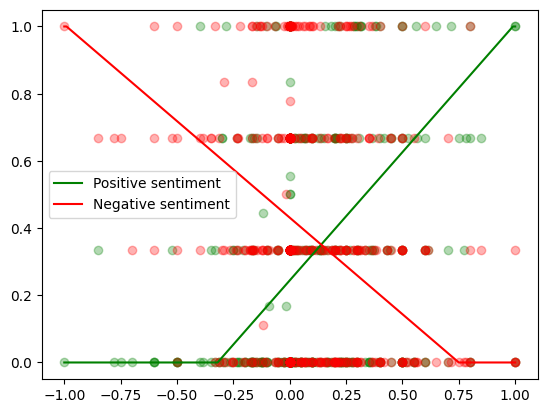

In [32]:
plt.plot([-1, fn_pos[0], fn_pos[1], 1], [0, 0, 1, 1], color='green', label='Positive sentiment')
plt.plot([-1, -1 * fn_neg[1], -1 * fn_neg[0], 1], [1, 1, 0, 0], color='red', label='Negative sentiment')
plt.scatter(survey_df['sentiments'], survey_df['pos_norm'], color='green', alpha=0.3)
plt.scatter(survey_df['sentiments'], survey_df['neg_norm'], color='red', alpha=0.3)
plt.legend()


We can observe that the fuzzy sets representing the positive and negative opinion are asymmetric. The Fuzzy set representing the negative opinion reaches far more to the positive polarity size. We can speculate that people can more easily find negative aspects of a tweet than positive ones.